In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("salary_data_cleaned.csv")

In [4]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'director' in title.lower():
        return 'director'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    else:
        return 'na'

In [5]:
def seniority(title):
    if 'junior' in title.lower() or 'jr' in title.lower():
        return 'junior'
    elif 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    else:
        return 'na'


In [6]:
df['title_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df['seniority'] = df['Job Title'].apply(seniority)

In [8]:
df['State'] = df.State.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

In [9]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [10]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0) 

In [11]:
df['minSal'] = df.apply(lambda x: x.minSal*2 if x.hourly == 1 else x.minSal , axis = 1)

In [12]:
df['maxSal'] = df.apply(lambda x: x.maxSal*2 if x.hourly == 1 else x.maxSal , axis = 1)

In [13]:
df['Company_txt'] = df.Company_txt.apply(lambda x: x.replace('\r\n',''))

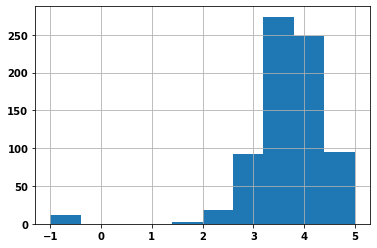

In [14]:
df.Rating.hist()

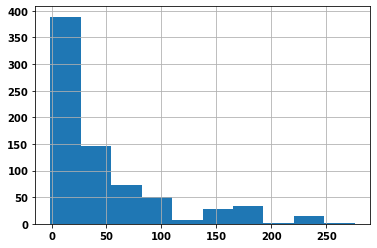

In [15]:
df.age.hist()

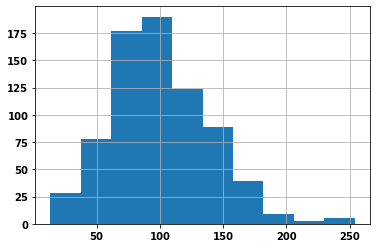

In [16]:
df.avgSal.hist()

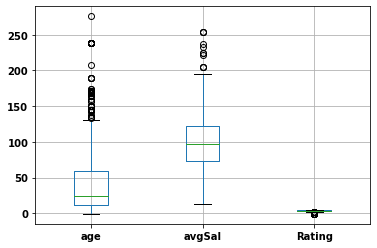

In [17]:
df.boxplot(column = ['age','avgSal','Rating'])

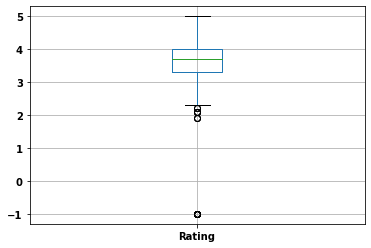

In [18]:
df.boxplot(column = 'Rating')

In [19]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'minSal', 'maxSal', 'avgSal',
       'Company_txt', 'State', 'age', 'title_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [20]:
df['Size'] = df.Size.apply(lambda x: x.replace('Unknown' , '1'))
df.Size.value_counts()

1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
1                            9
-1                           1
Name: Size, dtype: int64

In [21]:
df['min_Size'] = df.Size.apply(lambda x: x.split(' ')[0] if 'to' in x else int(x.split(' ')[0].replace('+',' ')))
df['max_Size'] = df.Size.apply(lambda x: x.split(' ')[2] if 'to' in x else int(x.split(' ')[0].replace('+',' ')))

In [22]:
df['min_Size'] = df['min_Size'].astype(int)
df['max_Size'] = df['max_Size'].astype(int)

In [23]:
df['avg_Size'] = (df.min_Size + df.max_Size) / 2

In [24]:
data = df[['age', 'Rating','avgSal','avg_Size','desc_len','num_comp']].corr()

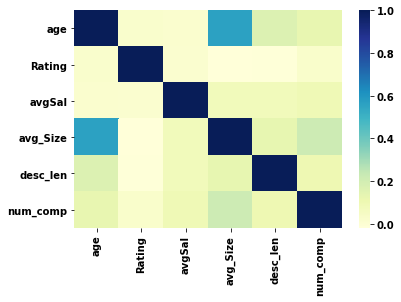

In [25]:
sns.heatmap(data, cmap="YlGnBu")

In [26]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'minSal', 'maxSal', 'avgSal',
       'Company_txt', 'State', 'age', 'title_simp', 'seniority', 'desc_len',
       'num_comp', 'min_Size', 'max_Size', 'avg_Size'],
      dtype='object')

In [27]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Industry', 'Sector','State','title_simp', 'seniority','Company_txt']]

Graph for Location : Total = 200


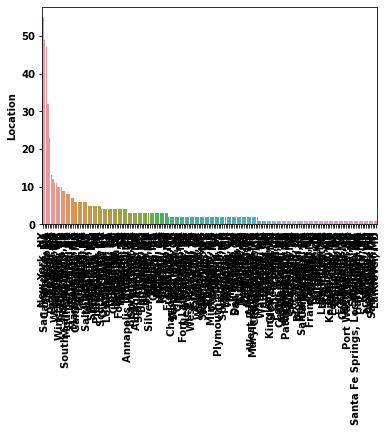

Graph for Headquarters : Total = 198


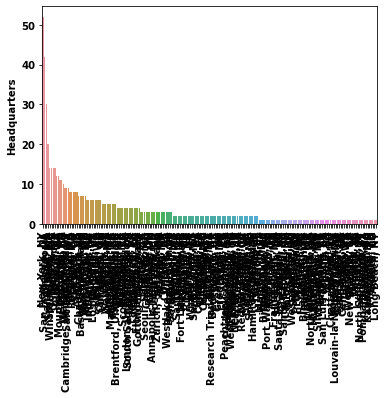

Graph for Size : Total = 9


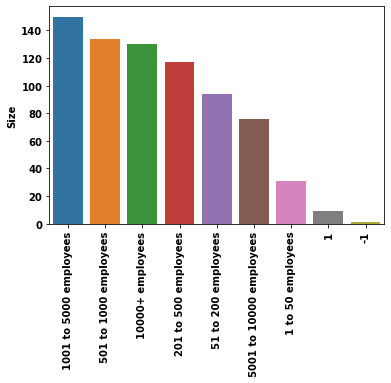

Graph for Industry : Total = 60


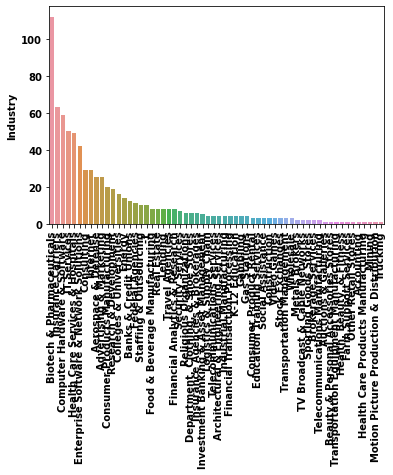

Graph for Sector : Total = 25


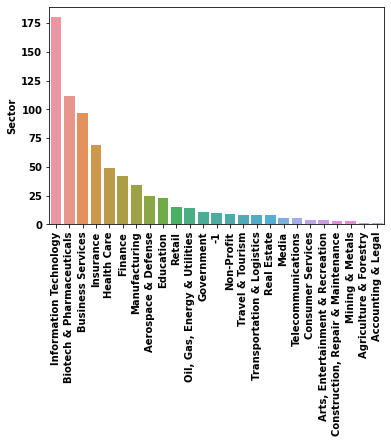

Graph for State : Total = 37


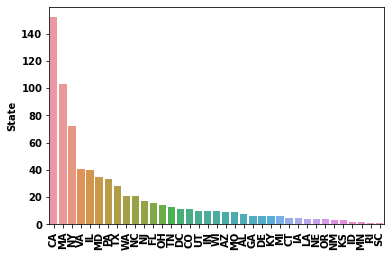

Graph for title_simp : Total = 7


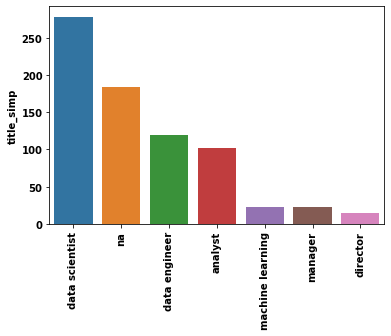

Graph for seniority : Total = 3


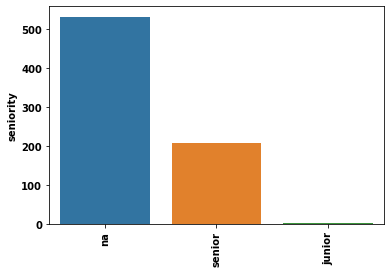

Graph for Company_txt : Total = 343


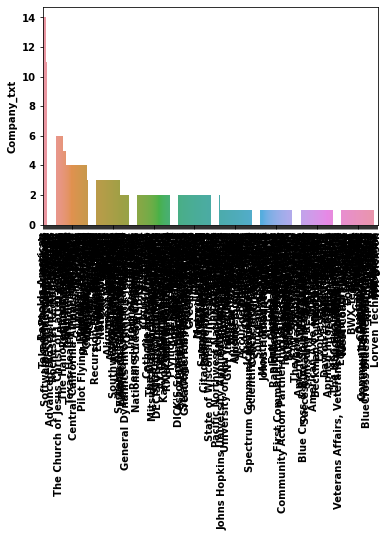

In [28]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s : Total = %d" %(i,len(cat_num)))
    chart = sns.barplot(x = cat_num.index , y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels() , rotation = 90)
    plt.show()

Graph for Location : Total = 20


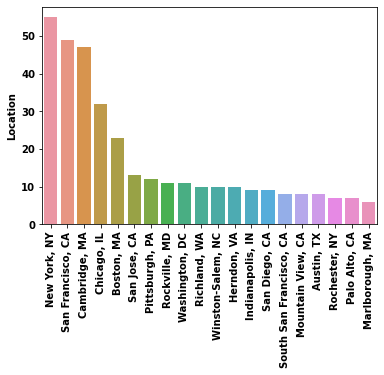

Graph for Company_txt : Total = 20


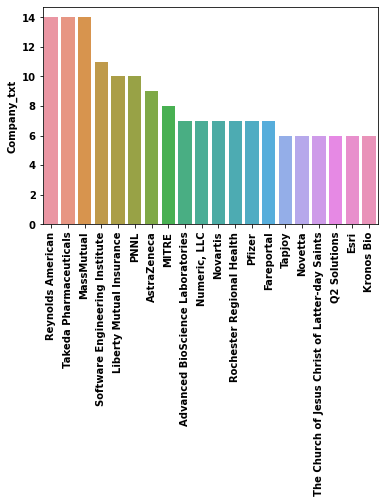

Graph for Industry : Total = 20


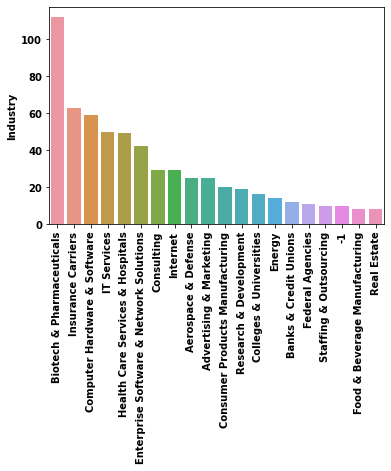

Graph for State : Total = 20


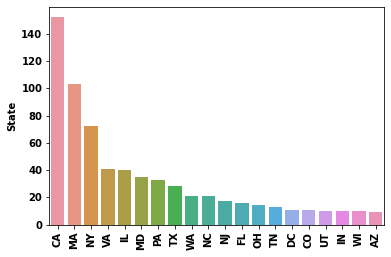

In [29]:
for i in df_cat[['Location','Company_txt','Industry','State']]:
    cat_num = df_cat[i].value_counts()[:20]
    print("Graph for %s : Total = %d" %(i,len(cat_num)))
    chart = sns.barplot(x = cat_num.index , y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels() , rotation = 90)
    plt.show()

In [30]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'minSal', 'maxSal', 'avgSal',
       'Company_txt', 'State', 'age', 'title_simp', 'seniority', 'desc_len',
       'num_comp', 'min_Size', 'max_Size', 'avg_Size'],
      dtype='object')

In [31]:
pd.pivot_table(df,index = ['State','title_simp'],values = 'avgSal', aggfunc = 'count').sort_values('State',ascending = False)

avgSal
State title_simp              
WI    na                     4
      data scientist         3
      analyst                3
WA    na                     1
      data scientist        17
      analyst                3
VA    na                     5
      machine learning       2
      data scientist        18
      data engineer         10
      analyst                6
UT    data engineer          3
      analyst                4
      data scientist         3
TX    na                     7
      data scientist        13
      data engineer          8
TN    data scientist         1
      data engineer         10
      analyst                2
SC    na                     1
RI    analyst                1
PA    machine learning       7
      data engineer          1
      data scientist         6
      analyst                8
      manager                3
      na                     8
OR    data scientist         3
      data engineer          1
...                        ...
IA    data engineer          3
GA    data scientist         3
      na                     3
FL    data scientist         7
      data engineer          3
      analyst                6
DE    na                     6
DC    data scientist         5
      data engineer          4
      analyst                2
CT    na                     3
      data scientist         2
CO    machine learning       1
      data engineer          3
      analyst                1
      na                     3
      data scientist         3
CA    na                    27
      manager                9
      machine learning       5
      data scientist        68
      data engineer         25
      analyst               18
AZ    data scientist         1
      data engineer          5
      analyst                1
      na                     2
AL    na                     2
      data engineer          1
      analyst                5

[114 rows x 1 columns]

In [32]:
pd.set_option('display.max_rows' , None)

In [33]:
from wordcloud import WordCloud, ImageColorGenerator,STOPWORDS
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

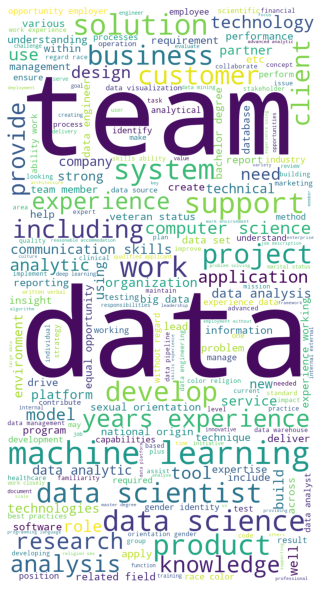

In [44]:
words = " ".join(df['Job Description'])
words = words.lower()

def punctuation_stop(text):
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w)
    return filtered

words_filtered = punctuation_stop(words)
text = " ".join([ele for ele in words_filtered])

wordcloud = WordCloud(width = 800, height = 1500,background_color ='white',stopwords = STOPWORDS,max_words = 2000, min_font_size = 10).generate(text)
                 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()                 




        